In [1]:
#浏览量和访问量跟文章阅读量的关系

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 모든 데이터를 볼 수 있는 ( head랑 tail만 보여주는게 아니라, 다 보여주는 방법)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 중국어 폰트 설정 하는 방법

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:\Windows\Fonts/simhei.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 폰트를 선명하게 하기
# retina설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

data_name = f"Eternaleaf公司小程序浏览量和淘宝浏览量和文章阅读量数据.csv"
df = pd.read_csv(data_name) #Encoding cp949는 못함

# Nan 값 0으로 만들어주기
df = df.fillna(value=0)
df.head()

C:\Users\toyou\AppData\Local\Temp/ipykernel_14392/3053223984.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,总计,文章的阅读量,淘宝特点活动,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,02-21,16.0,4.0,184.0,23.0,0,227.0,2002.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,02-22,7.0,2.0,114.0,30.0,0,153.0,2177.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02-23,8.0,1.0,155.0,18.0,0,182.0,712.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,02-24,22.0,3.0,119.0,19.0,0,163.0,685.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,02-25,3.0,1.0,102.0,31.0,0,137.0,685.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 데이터처리

In [3]:
#df =df.drop(['Unnamed: 9'],axis=1)
df.drop(df.columns[8:], axis=1 , inplace=True)
df

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,总计,文章的阅读量
0,02-21,16.0,4.0,184.0,23.0,0,227.0,2002.0
1,02-22,7.0,2.0,114.0,30.0,0,153.0,2177.0
2,02-23,8.0,1.0,155.0,18.0,0,182.0,712.0
3,02-24,22.0,3.0,119.0,19.0,0,163.0,685.0
4,02-25,3.0,1.0,102.0,31.0,0,137.0,685.0
5,02-26,13.0,4.0,127.0,28.0,0,172.0,1290.0
6,02-27,4.0,2.0,79.0,22.0,0,107.0,685.0
7,02-28,73.0,12.0,123.0,28.0,40,276.0,423.0
8,03-01,33.0,18.0,143.0,33.0,6,233.0,3199.0
9,03-02,20.0,4.0,158.0,32.0,0,214.0,2791.0


In [4]:
df.columns

Index(['日期', '小程序（浏览量）', '小程序（访客量）', '淘宝（浏览量）', '淘宝（访客量）', '掌上大学', '总计',
       '文章的阅读量'],
      dtype='object')

In [5]:
# 각 컬럼끼리의 상관계수를 보는 법!
df.corr()

,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,总计,文章的阅读量
小程序（浏览量）,1.000000,0.903492,0.348042,0.350442,0.799632,0.360221
小程序（访客量）,0.903492,1.000000,0.269541,0.294076,0.715594,0.383629
淘宝（浏览量）,0.348042,0.269541,1.000000,0.811667,0.835417,0.356209
淘宝（访客量）,0.350442,0.294076,0.811667,1.000000,0.757429,0.323132
总计,0.799632,0.715594,0.835417,0.757429,1.000000,0.445290
文章的阅读量,0.360221,0.383629,0.356209,0.323132,0.445290,1.000000


In [6]:
df = df.drop(df.index[35:]) 

In [7]:
#컬럼 삭제
df_new = df
df_new = df_new.drop(['总计'],axis=1)
df_new

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,文章的阅读量
0,02-21,16.0,4.0,184.0,23.0,0,2002.0
1,02-22,7.0,2.0,114.0,30.0,0,2177.0
2,02-23,8.0,1.0,155.0,18.0,0,712.0
3,02-24,22.0,3.0,119.0,19.0,0,685.0
4,02-25,3.0,1.0,102.0,31.0,0,685.0
5,02-26,13.0,4.0,127.0,28.0,0,1290.0
6,02-27,4.0,2.0,79.0,22.0,0,685.0
7,02-28,73.0,12.0,123.0,28.0,40,423.0
8,03-01,33.0,18.0,143.0,33.0,6,3199.0
9,03-02,20.0,4.0,158.0,32.0,0,2791.0


In [8]:
#인덱스 삭제
df_new = df_new.drop(df.index[60:]) # 03-22기준
df_new

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,文章的阅读量
0,02-21,16.0,4.0,184.0,23.0,0,2002.0
1,02-22,7.0,2.0,114.0,30.0,0,2177.0
2,02-23,8.0,1.0,155.0,18.0,0,712.0
3,02-24,22.0,3.0,119.0,19.0,0,685.0
4,02-25,3.0,1.0,102.0,31.0,0,685.0
5,02-26,13.0,4.0,127.0,28.0,0,1290.0
6,02-27,4.0,2.0,79.0,22.0,0,685.0
7,02-28,73.0,12.0,123.0,28.0,40,423.0
8,03-01,33.0,18.0,143.0,33.0,6,3199.0
9,03-02,20.0,4.0,158.0,32.0,0,2791.0


### 판다스로 데이터 시각화

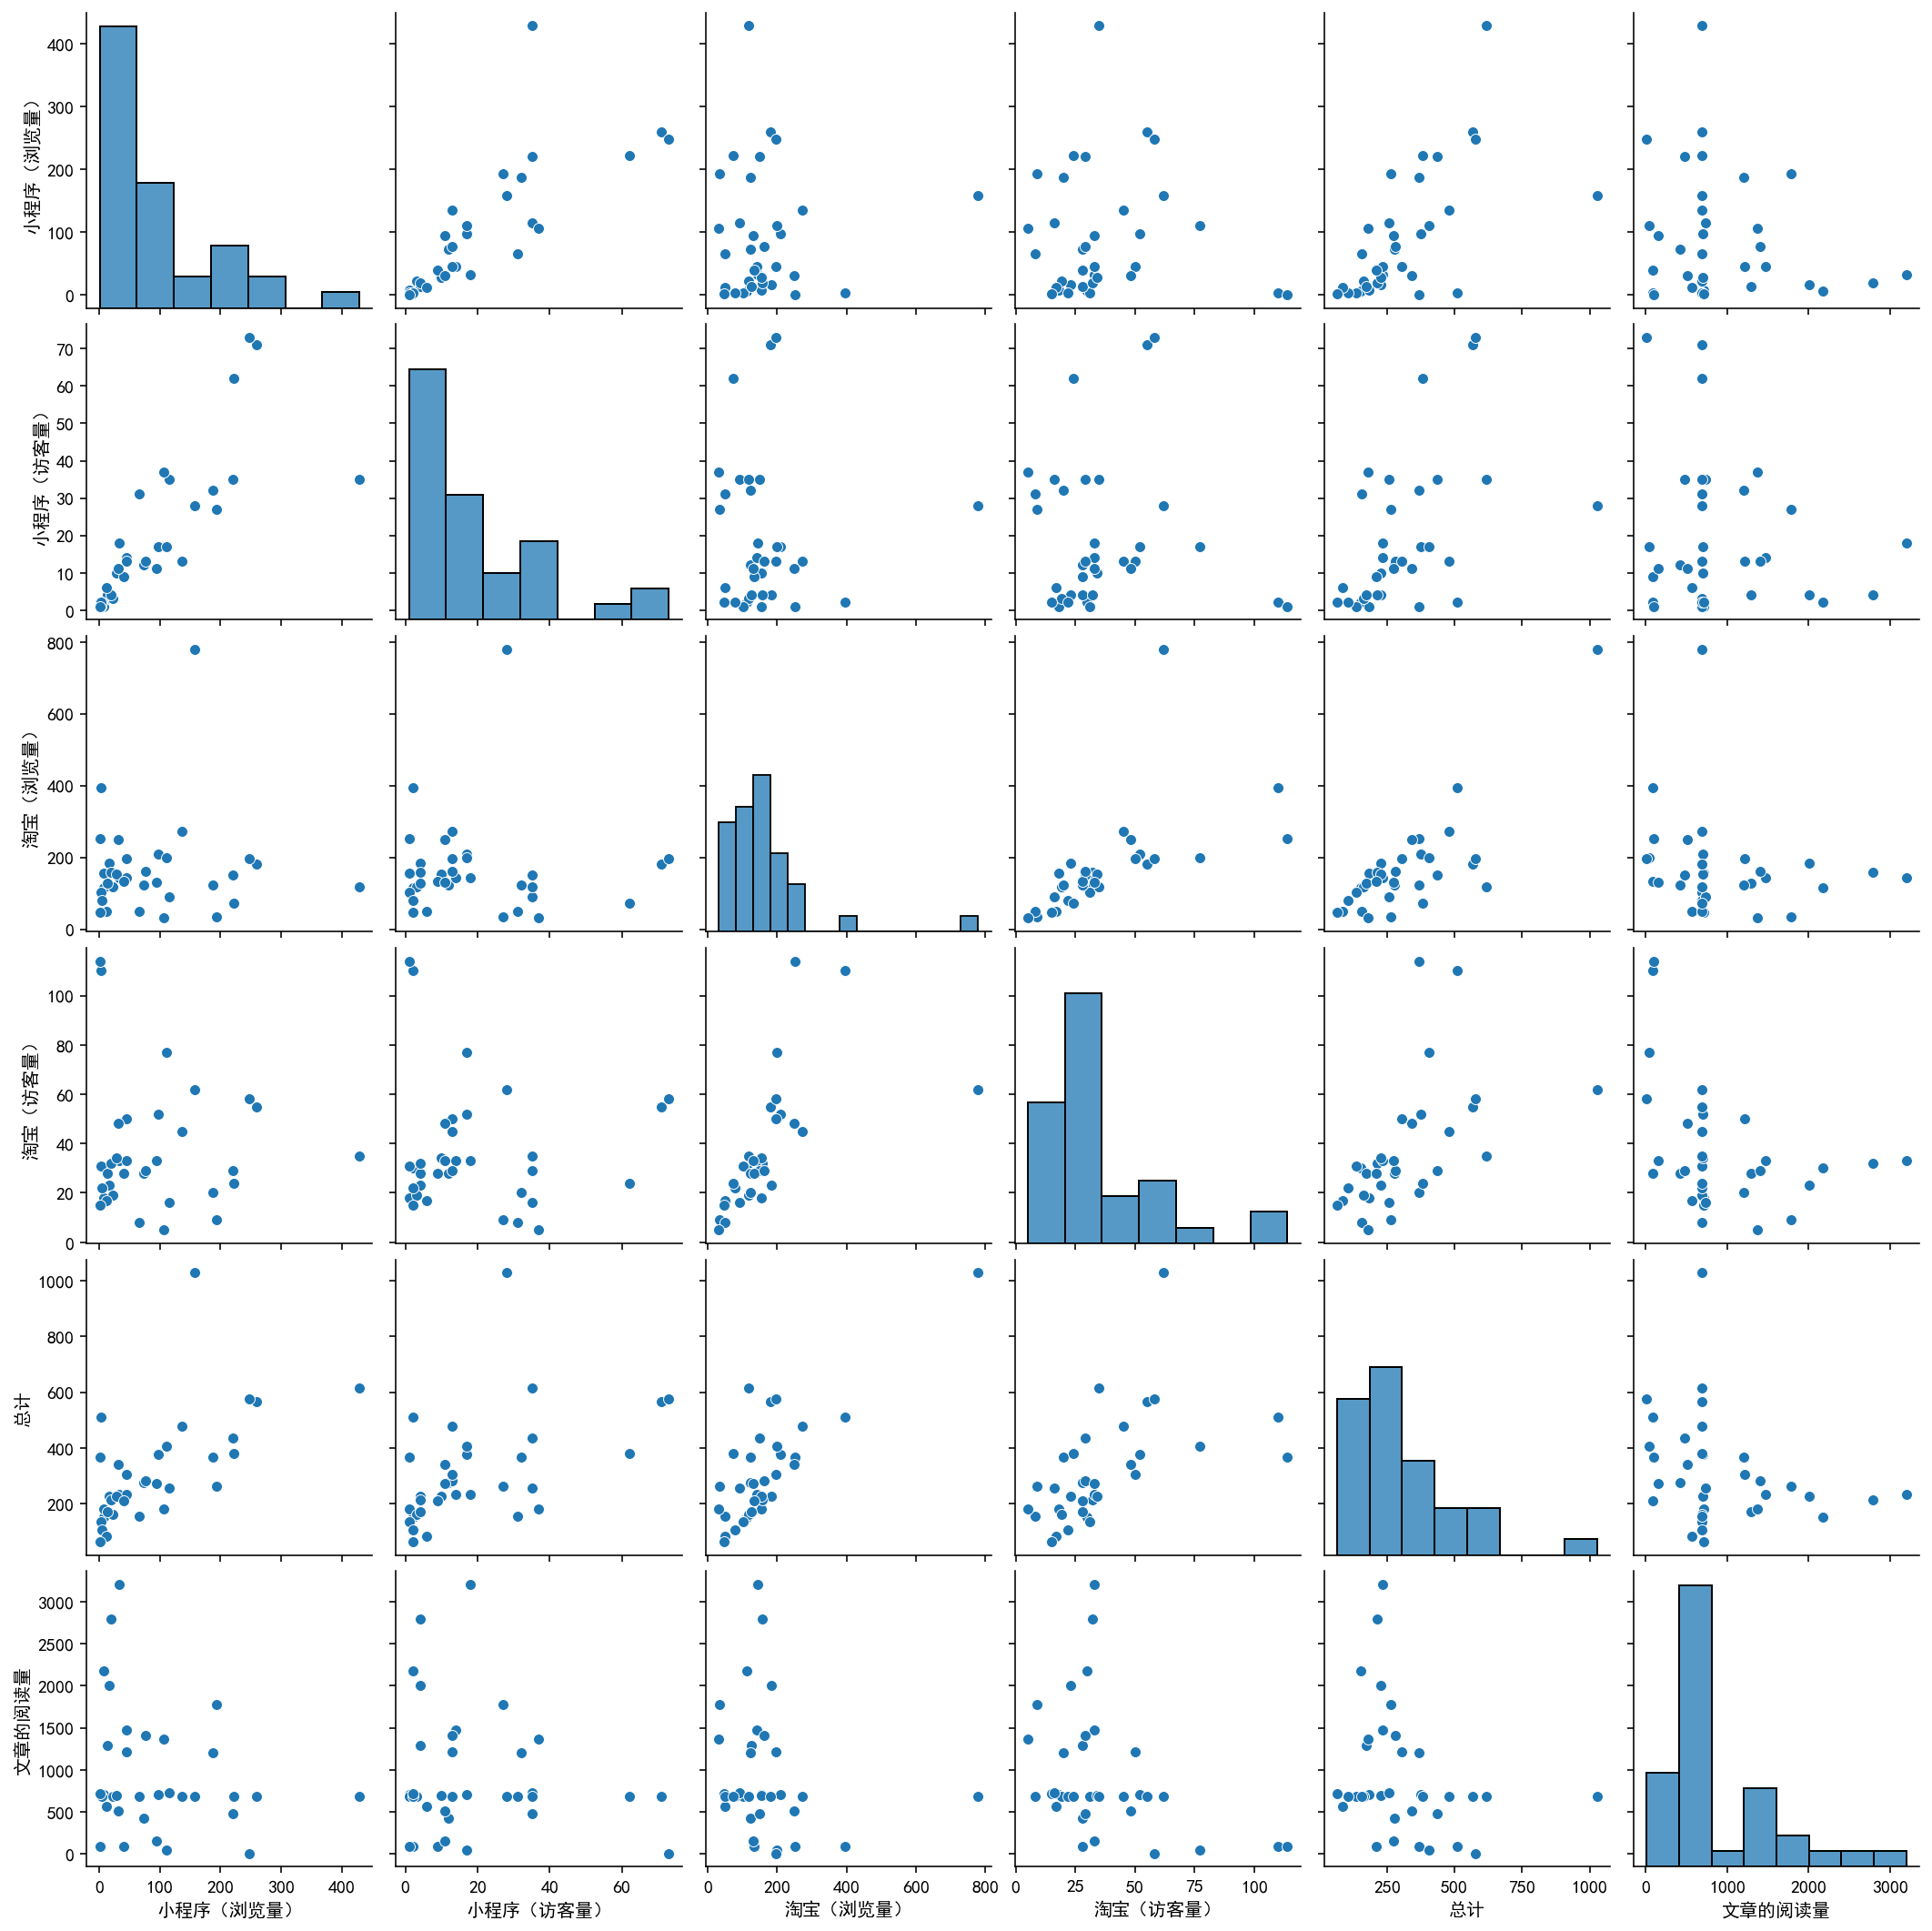

In [34]:
grid_ndf = sns.pairplot(df)

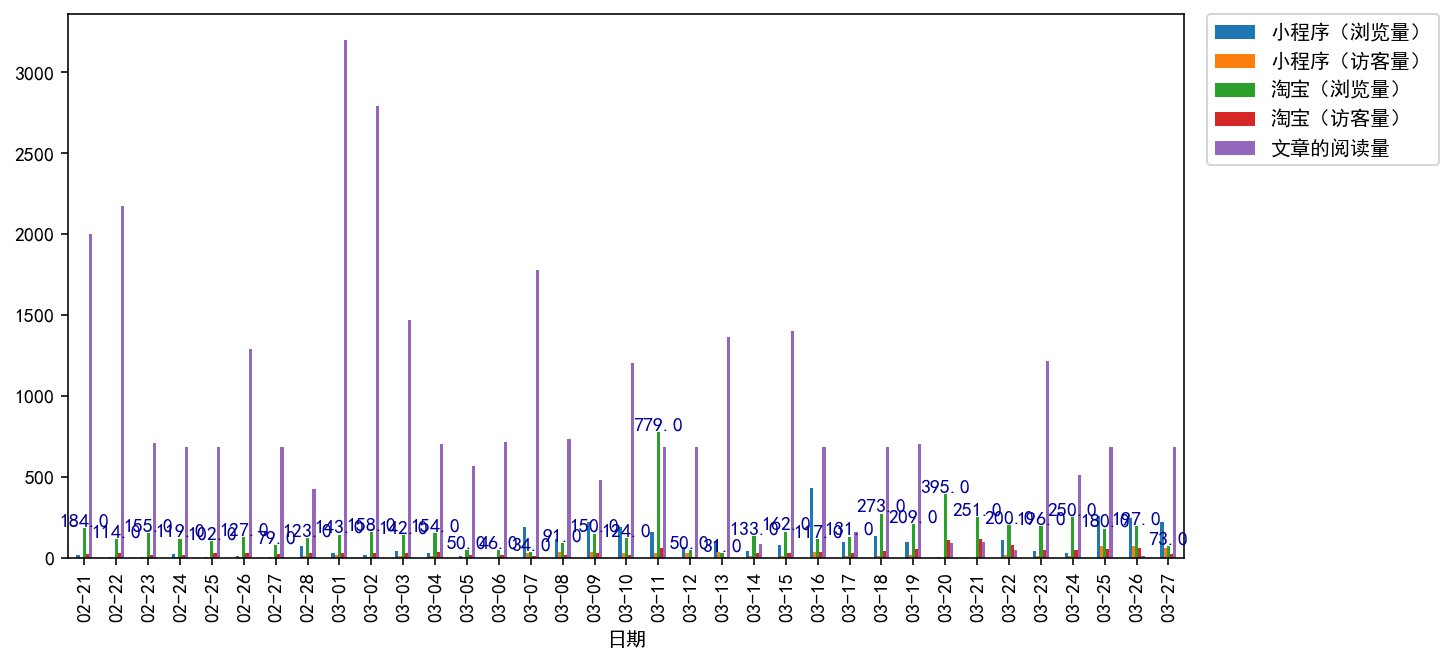

In [9]:
# plt 크기 설정!
plt.rcParams["figure.figsize"] = (10, 5)

#막대 그래프!
df_new.plot(x='日期',kind='bar')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)  #레전드값을 바깥에 그릴수 있게 하는 방법

# 그래프에 수치 표시하는 방법!
for i , value in enumerate(df_new['淘宝（浏览量）']):
    plt.text(i,value,'%s'% value, fontsize=10, color='#000099',ha='center',va='bottom')

<AxesSubplot:xlabel='日期'>

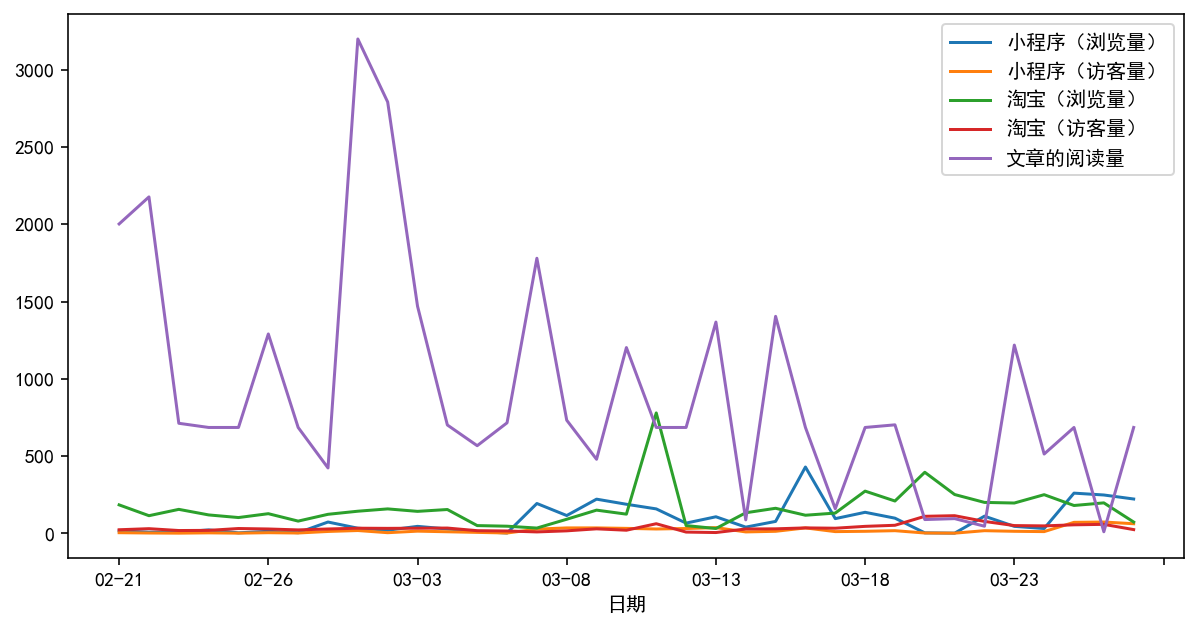

In [10]:
# 선그래프

plt.rcParams["figure.figsize"] = (10, 5)
df_new.plot(x='日期')

In [11]:
df_new.tail()

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,文章的阅读量
30,03-23,45.0,13.0,196.0,50.0,0,1218.0
31,03-24,31.0,11.0,250.0,48.0,0,513.0
32,03-25,260.0,71.0,180.0,55.0,0,685.0
33,03-26,248.0,73.0,197.0,58.0,0,10.0
34,03-27,222.0,62.0,73.0,24.0,0,685.0


<AxesSubplot:xlabel='淘宝（浏览量）', ylabel='总计'>

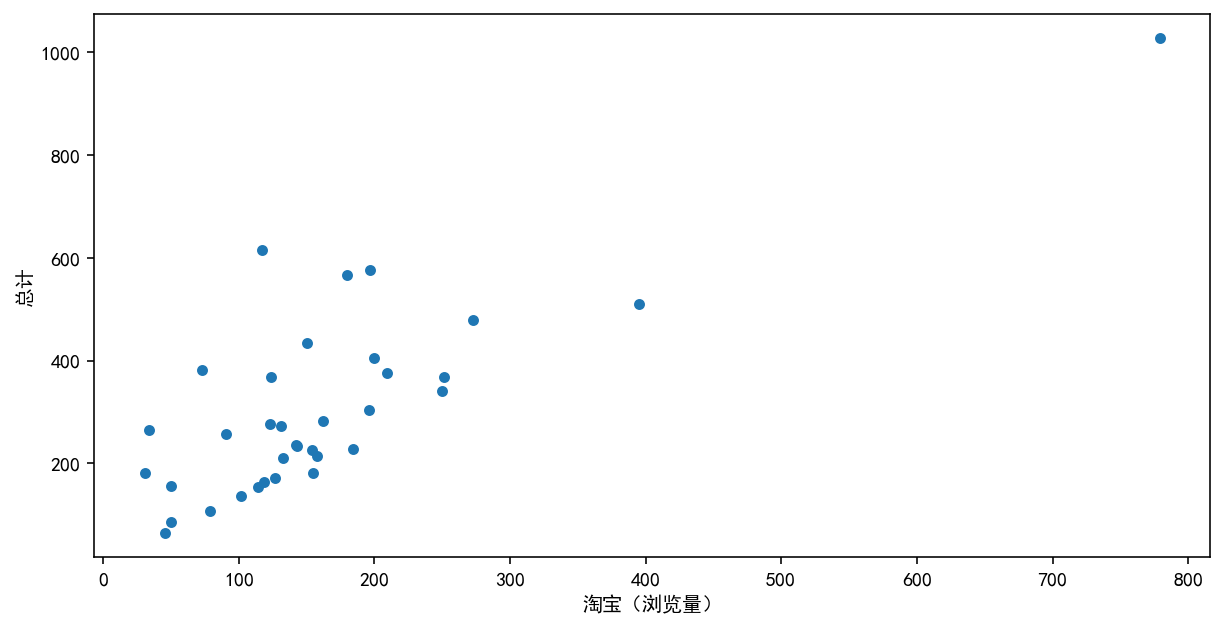

In [12]:
#산점도
df.plot(x='淘宝（浏览量）',y='总计', kind='scatter')

# Seaborn 데이터 시각화

In [13]:
# regplot은 못 그리겠음...

<AxesSubplot:xlabel='小程序（浏览量）', ylabel='淘宝（访客量）'>

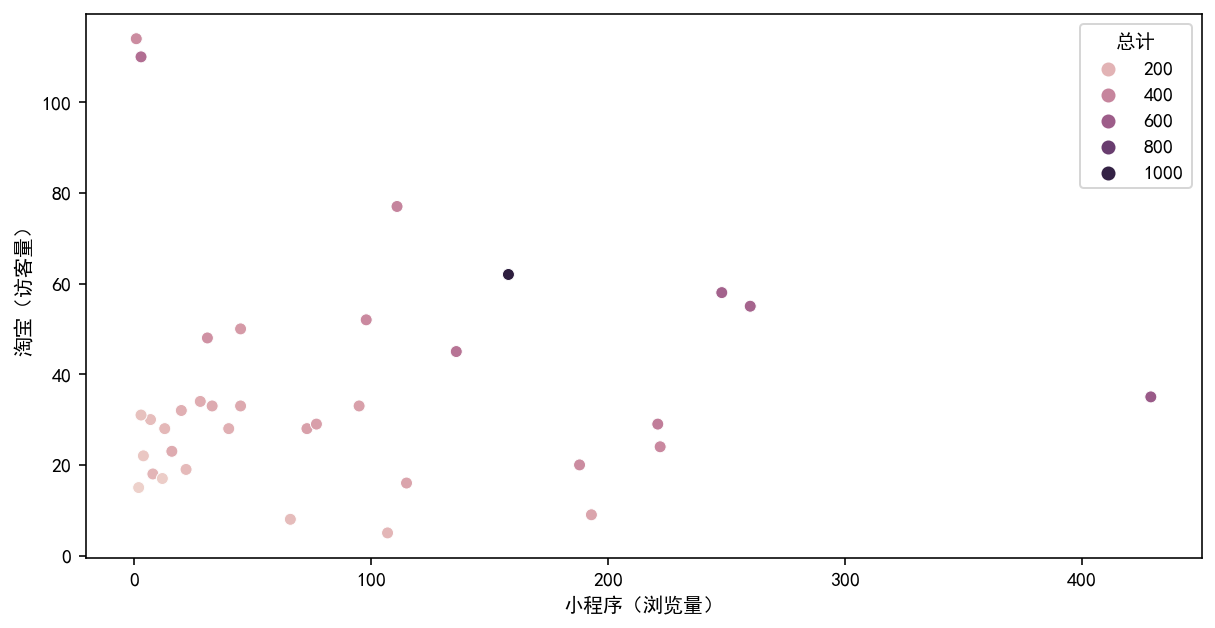

In [14]:
#Scatterplot
sns.scatterplot(data=df, x='小程序（浏览量）', y='淘宝（访客量）', hue='总计', sizes=(50,330))

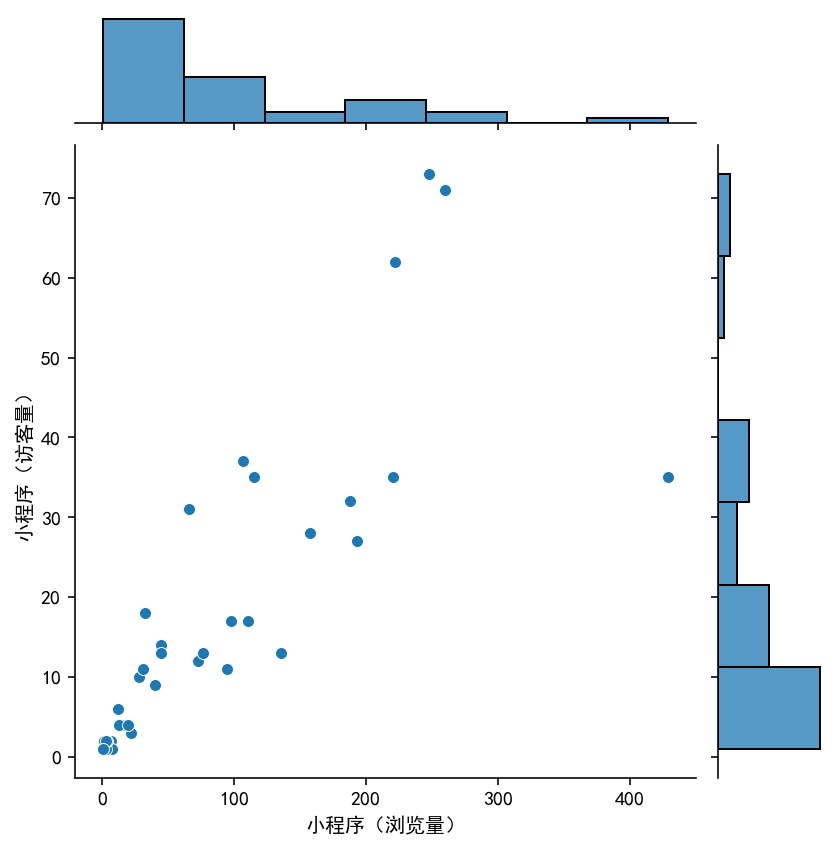

In [15]:
#seaborn 데이터 시각화
#jointplot
ax = sns.jointplot(x='小程序（浏览量）', y='小程序（访客量）', data =df_new , kind='scatter')
ax.set_axis_labels(xlabel='小程序（浏览量）',ylabel='小程序（访客量）')

<AxesSubplot:xlabel='小程序（浏览量）', ylabel='淘宝（访客量）'>

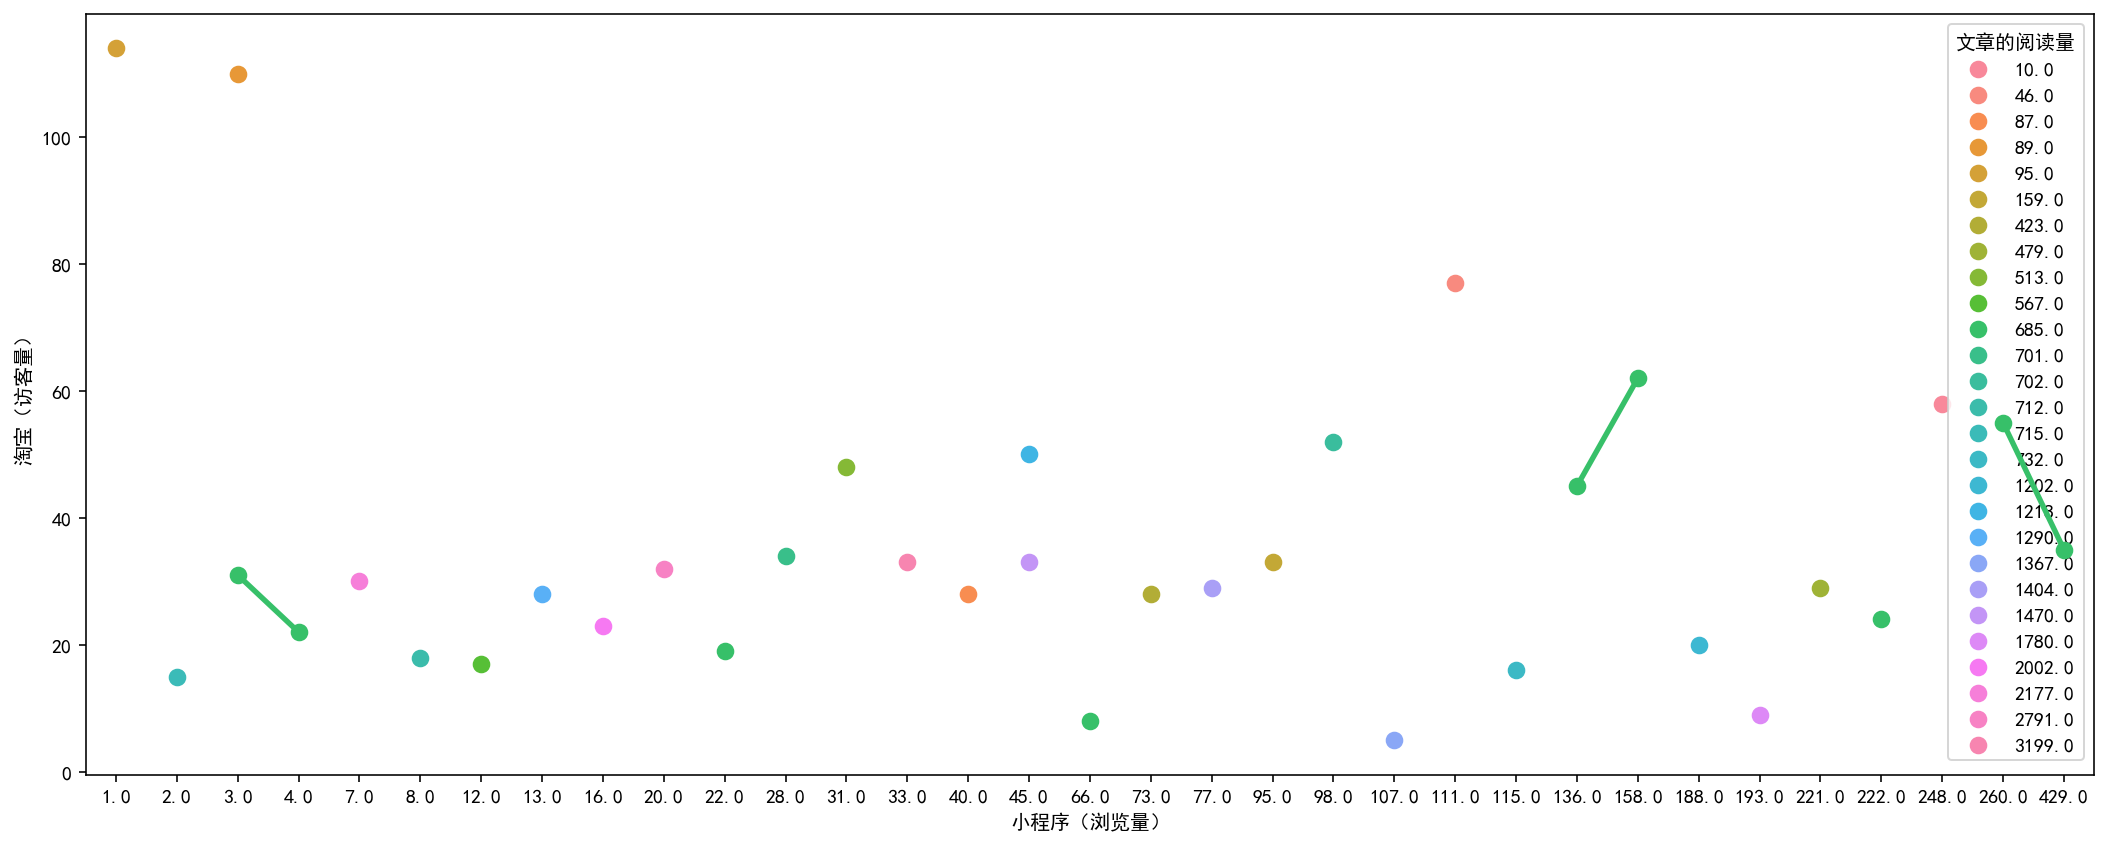

In [16]:
# pointplot 
plt.figure(figsize=(18,7))
sns.pointplot(data=df, x='小程序（浏览量）', y='淘宝（访客量）', hue='文章的阅读量')

Text(0.5, 1.0, '数据可视化')

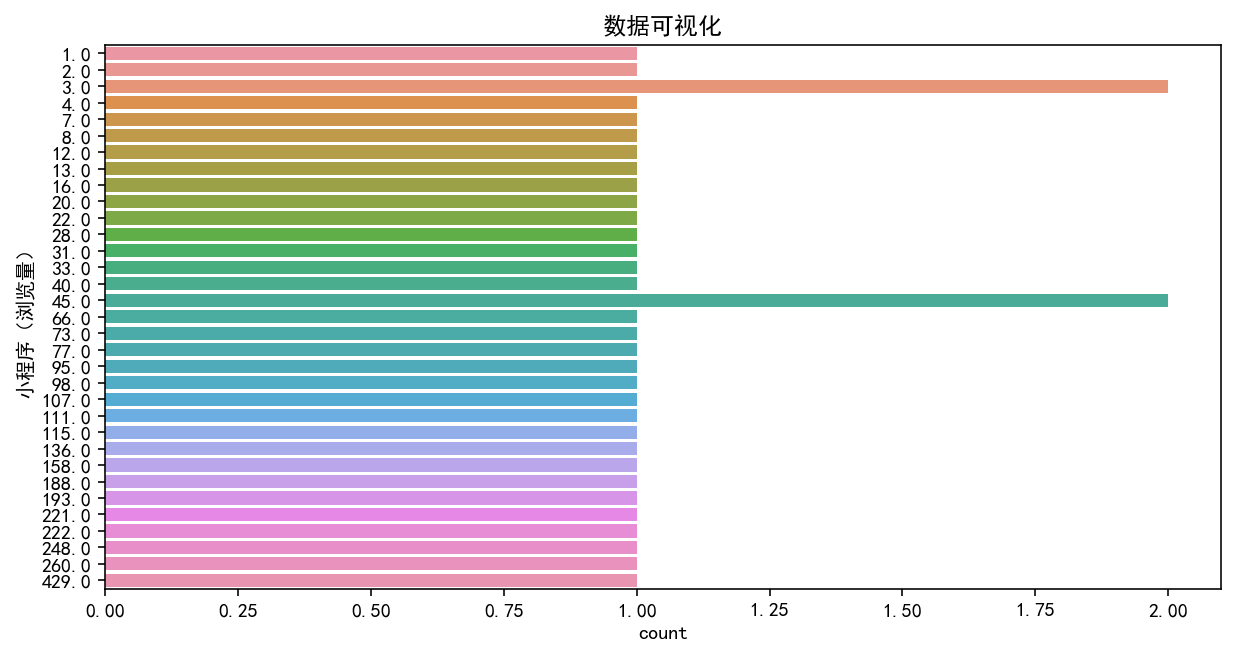

In [20]:
#seaborn
# countplot은 적합하지 않다.
ax =sns.countplot(y='小程序（浏览量）', data =df_new)
ax.set_title('数据可视化')

<AxesSubplot:xlabel='小程序（浏览量）', ylabel='总计'>

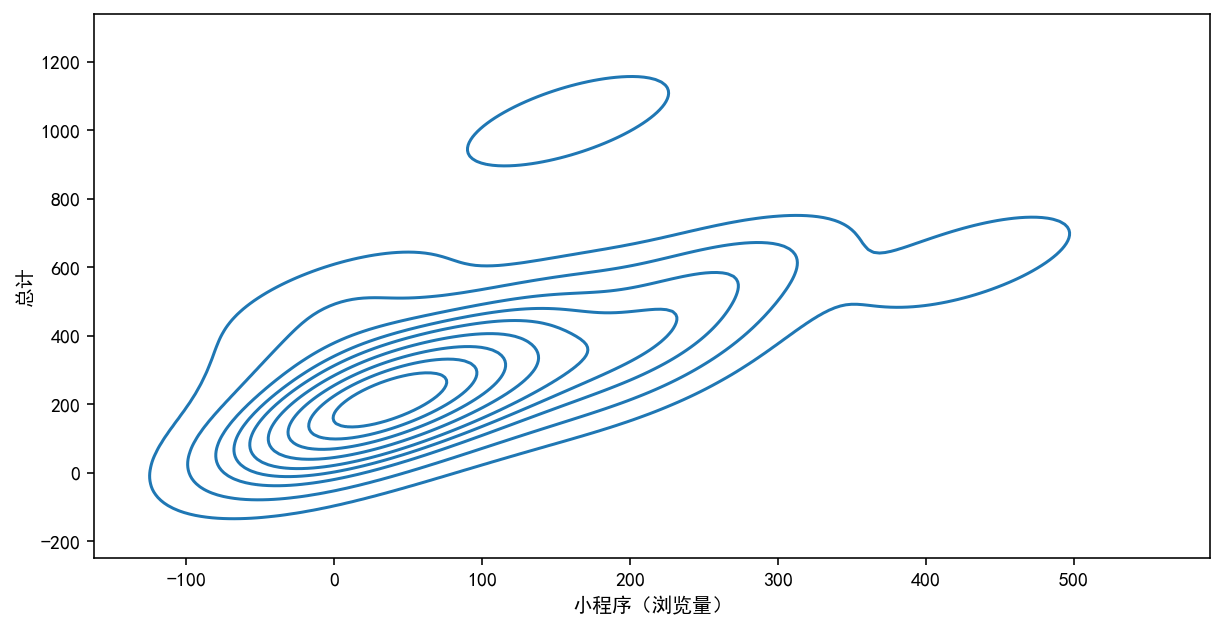

In [21]:
#seaborn kdeplot()
sns.kdeplot(x='小程序（浏览量）', y='总计', data =df)

<Figure size 1296x504 with 0 Axes>

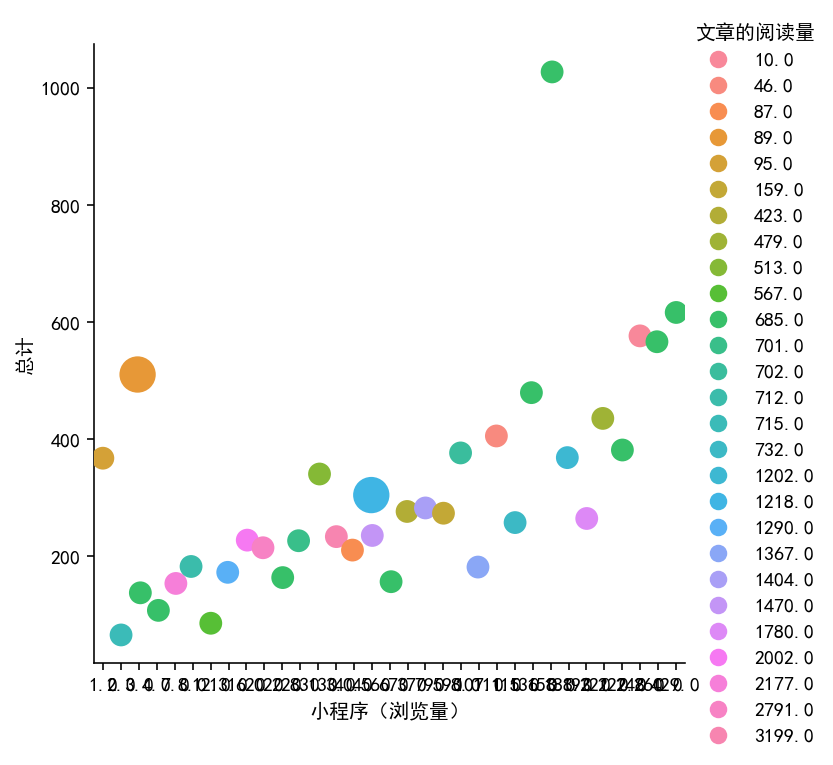

In [22]:
# 3개의 컬럼을 비교가능
# catplot
plt.figure(figsize=(18,7))
sns.catplot(x='小程序（浏览量）', y='总计',hue='文章的阅读量', data =df, sizes=(130,330))

Text(0, 0.5, '文章的阅读量')

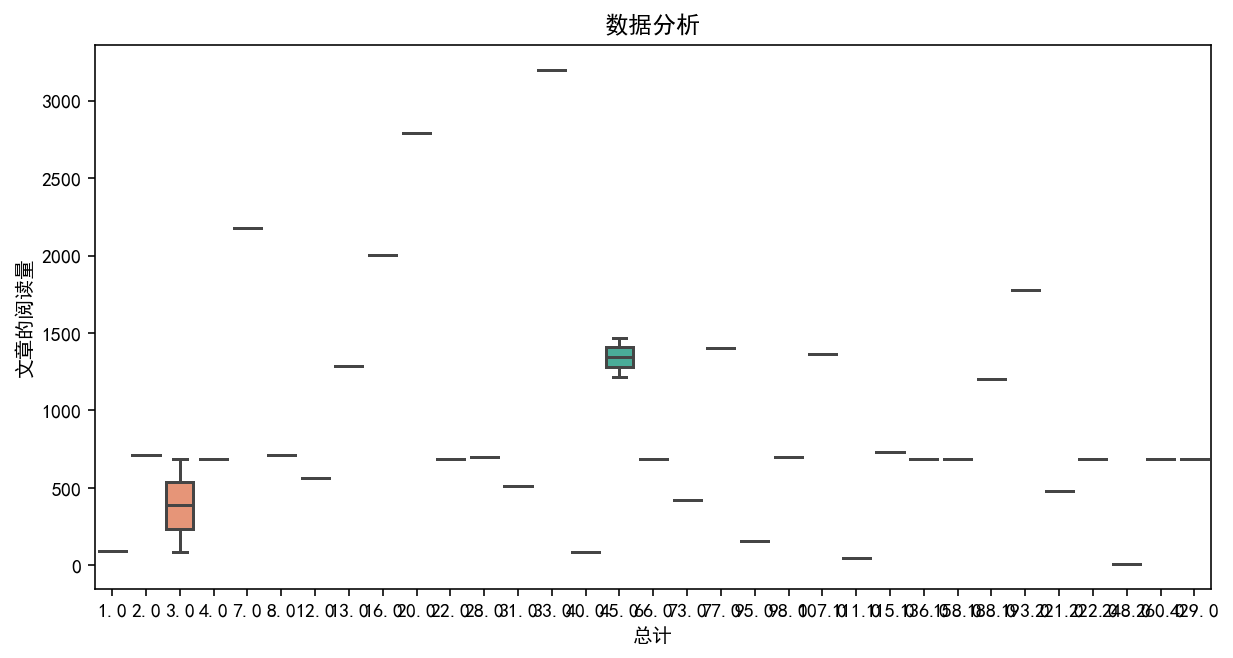

In [23]:
#boxplot

ax = plt.subplots()
ax = sns.boxplot(x='小程序（浏览量）', y='文章的阅读量',  data=df)
ax.set_title('数据分析')
ax.set_xlabel('总计')
ax.set_ylabel('文章的阅读量')

Text(0, 0.5, '文章的阅读量')

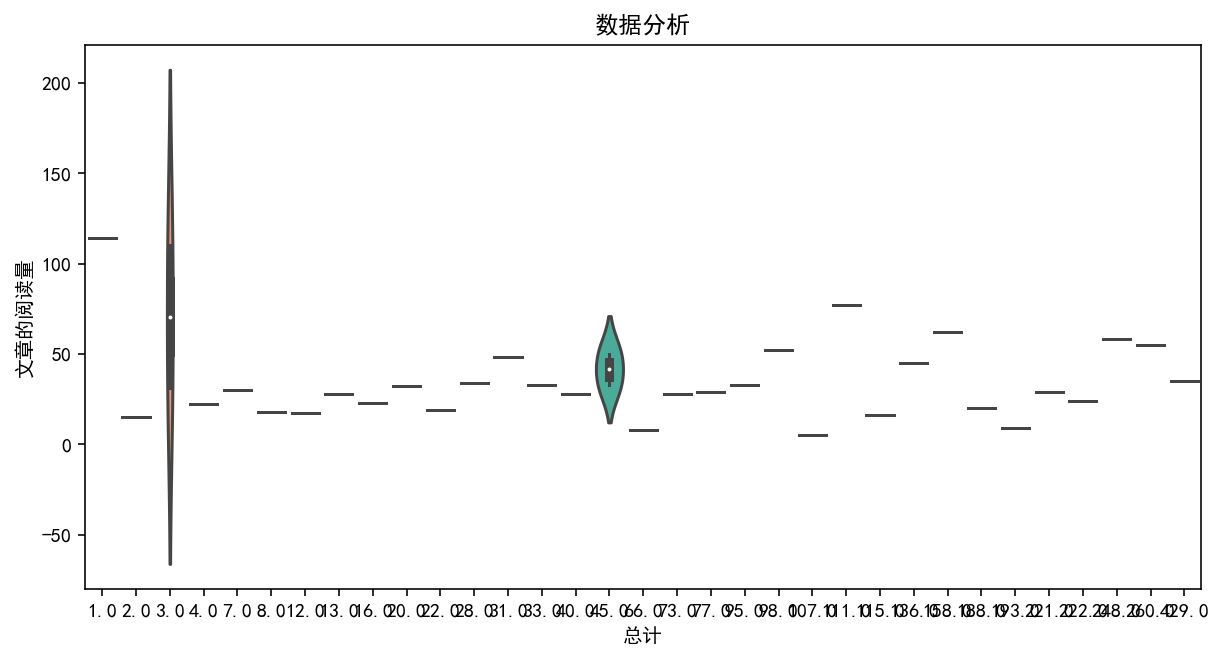

In [24]:
# violinplot 

ax=plt.subplots()
ax=sns.violinplot(x='小程序（浏览量）', y = '淘宝（访客量）', data=df)
ax.set_title('数据分析')
ax.set_xlabel('总计')
ax.set_ylabel('文章的阅读量')

# Matplotlib 시각화

<AxesSubplot:>

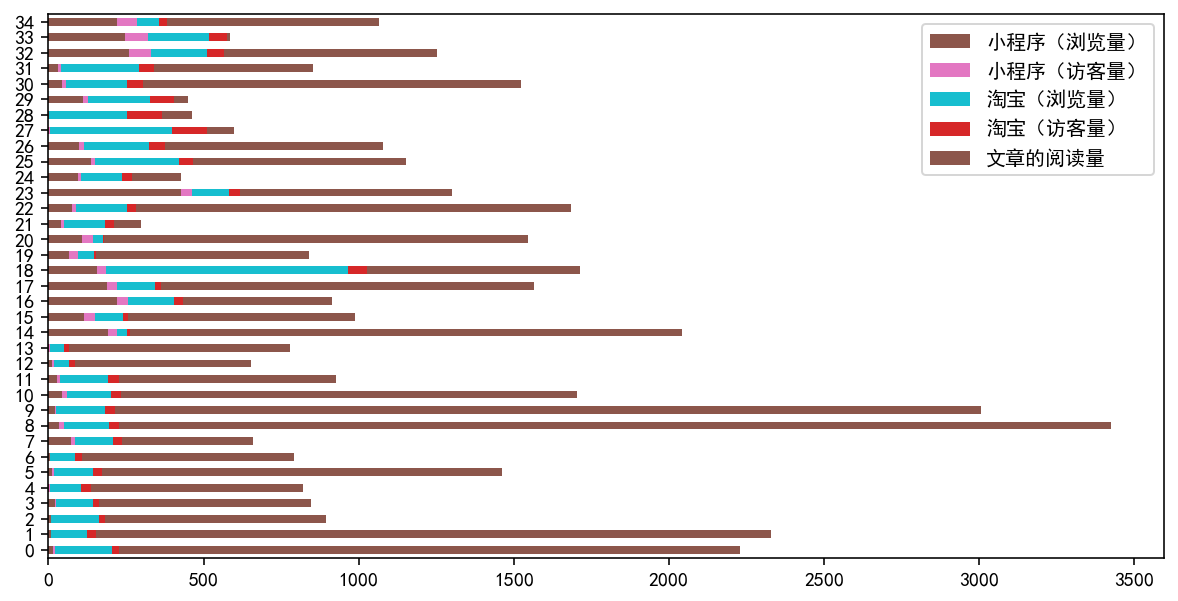

In [25]:
df_new.plot(kind='barh',color=['tab:brown','tab:pink','tab:cyan','tab:red'],stacked=True)

Text(0.5, 1.0, '数据分析')

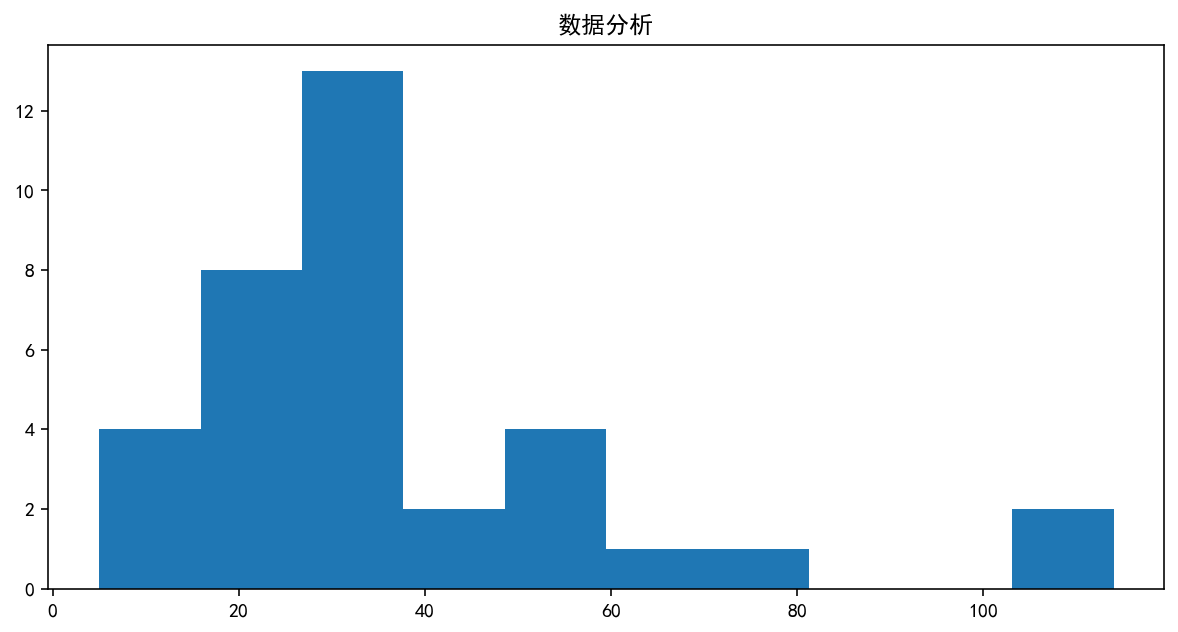

In [26]:
# Histogram
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(df_new['淘宝（访客量）'], bins =10)
axes1.set_title('数据分析')

Text(0, 0.5, '小程序（浏览量）')

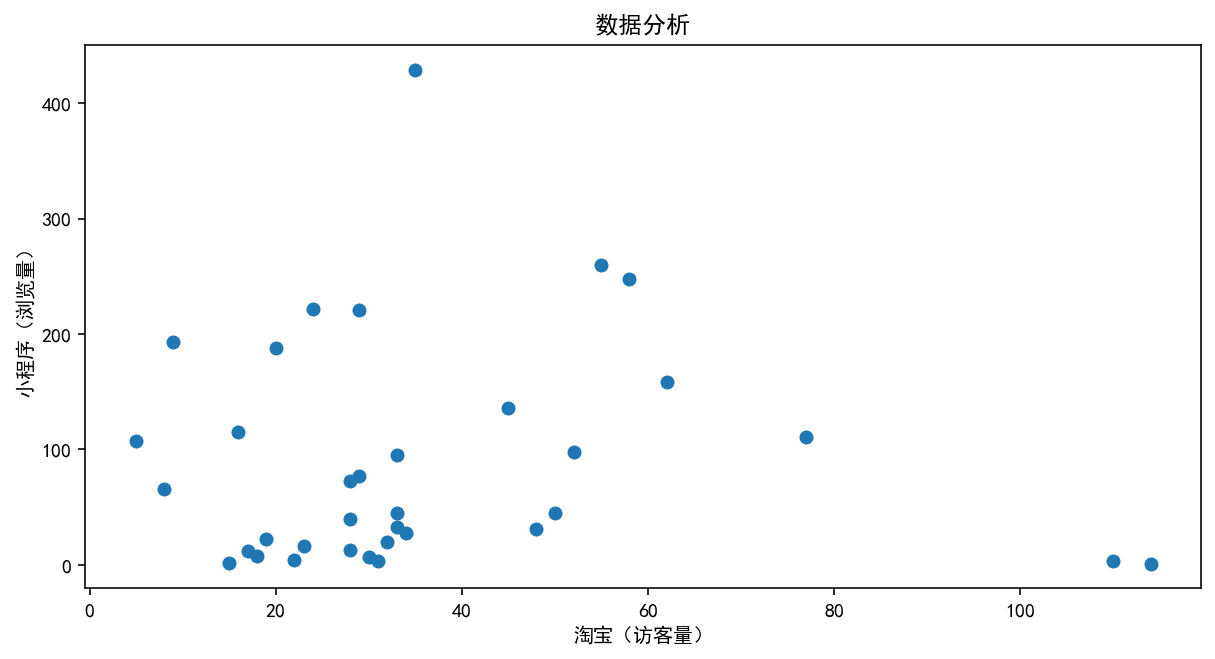

In [27]:
# Scatterplot
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(df_new['淘宝（访客量）'], df_new['小程序（浏览量）'])
axes1.set_title('数据分析')
axes1.set_xlabel('淘宝（访客量）')
axes1.set_ylabel('小程序（浏览量）')

In [28]:
#axes1.boxplot(df['淘宝（访客量）'],df['小程序（浏览量）'])

# 단순회귀로 상관관계 분석해보기
### 利用机器学习单纯回归分析的数据相关关系分析

Text(0, 0.5, '文章的阅读量')

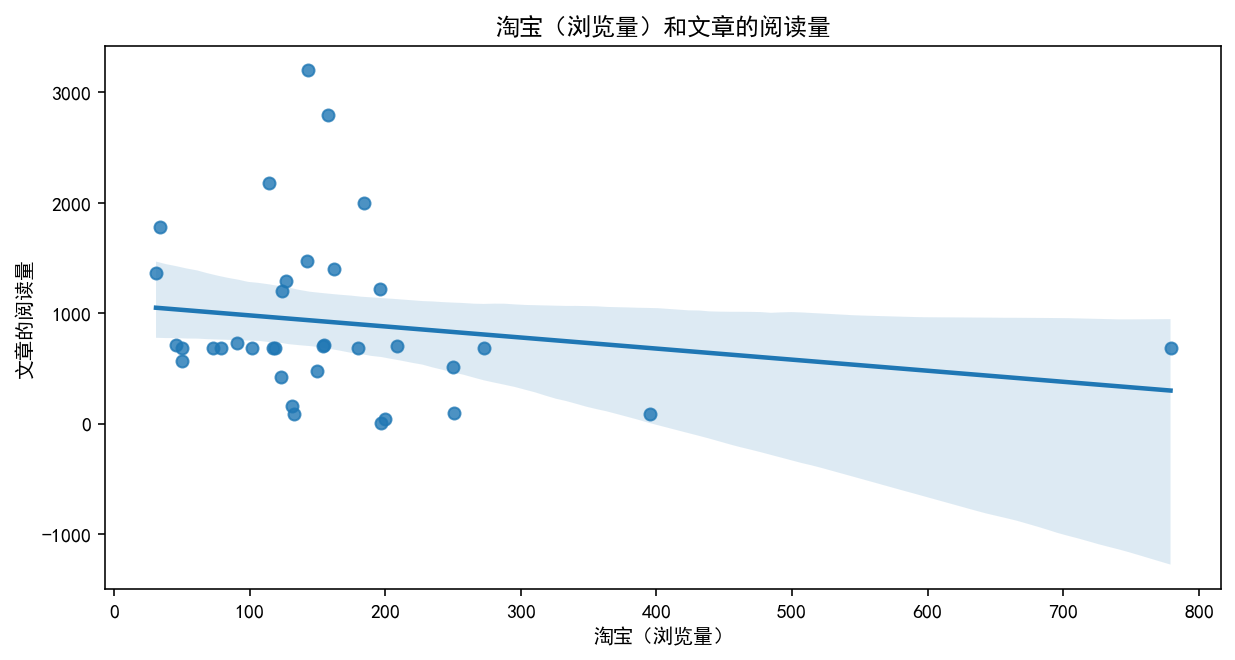

In [29]:
ax=plt.subplot()
ax=sns.regplot(x='淘宝（浏览量）', y='文章的阅读量', data = df)
ax.set_title('淘宝（浏览量）和文章的阅读量')
ax.set_xlabel('淘宝（浏览量）')
ax.set_ylabel('文章的阅读量')

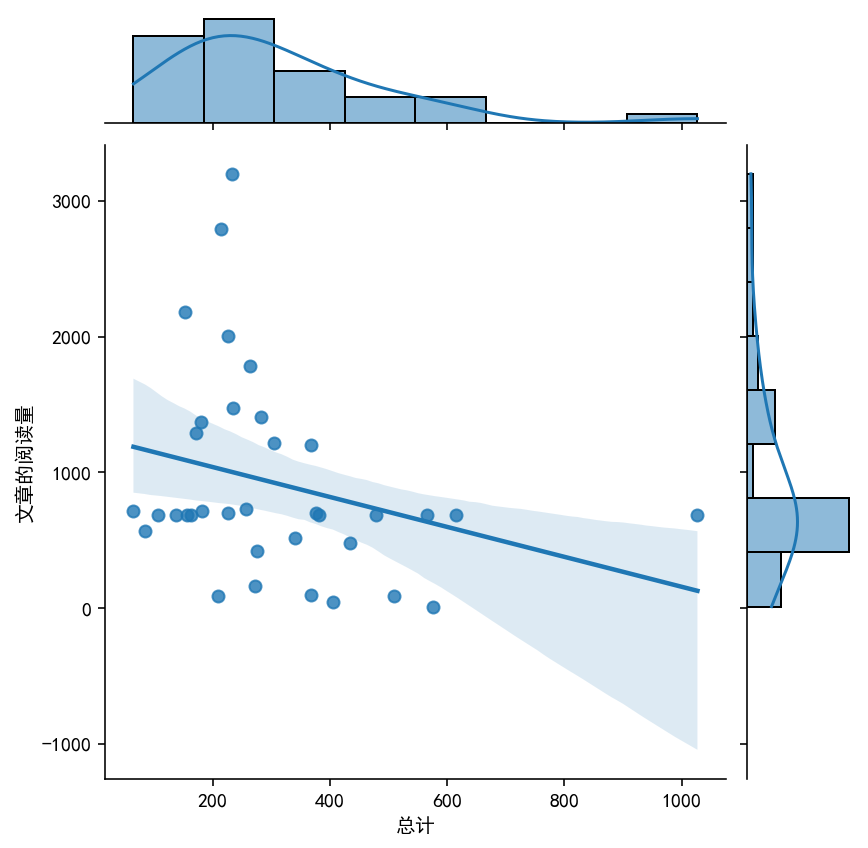

In [30]:
# 산점도 
sns.jointplot(x='总计',y='文章的阅读量',data=df,kind='reg')

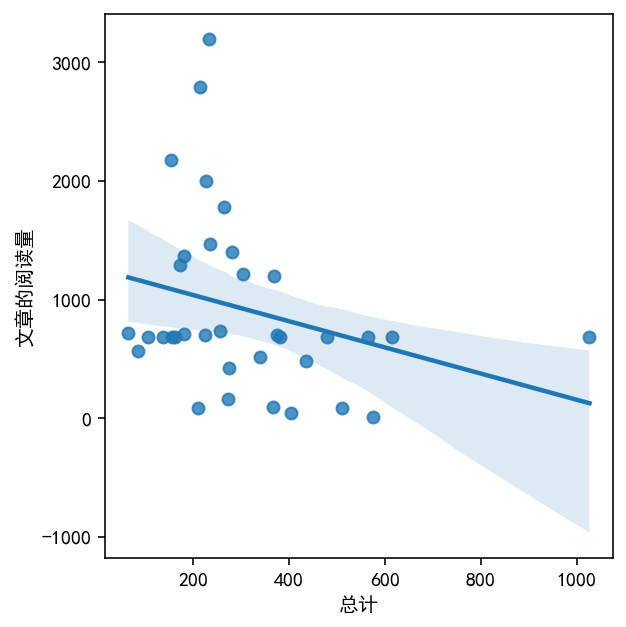

In [31]:
# Seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 그래프(산점도) 그리기.

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='总计', y='文章的阅读量', data=df, ax=ax1)  # 회귀선 표시
#sns.regplot(x='总计', y='文章的阅读量', data=df, ax=ax2) # 회귀선 표시 안함 표시는 , fit_reg = False
    
plt.show()
plt.close()

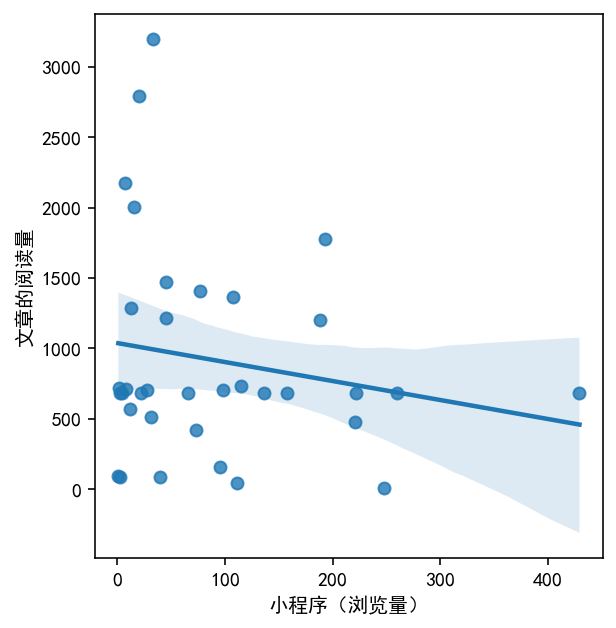

In [32]:
# Seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 그래프(산점도) 그리기.

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='小程序（浏览量）', y='文章的阅读量', data=df, ax=ax1)  # 회귀선 표시
#sns.regplot(x='总计', y='文章的阅读量', data=df, ax=ax2) # 회귀선 표시 안함 표시는 , fit_reg = False
    
plt.show()
plt.close()

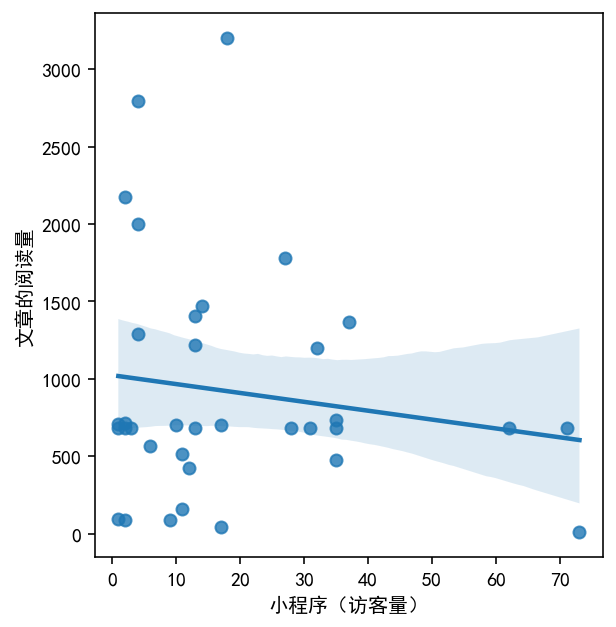

In [33]:
# Seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 그래프(산점도) 그리기.

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='小程序（访客量）', y='文章的阅读量', data=df, ax=ax1)  # 회귀선 표시
#sns.regplot(x='总计', y='文章的阅读量', data=df, ax=ax2) # 회귀선 표시 안함 표시는 , fit_reg = False
    
plt.show()
plt.close()

In [34]:
ndf =df

In [35]:
X=ndf[['文章的阅读量']] # 독립 변수 X
y=ndf[['总计']]    # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,            # 독립 변수
                                                   y,             # 종속 변수
                                                   test_size=0.3,  # 검증 30%
                                                   random_state=10 # 랜덤 추출 값
                                                   )

print('train data 개수 : ', len(X_train))
print('testdata 개수 : ', len(X_test))

train data 개수 :  24
testdata 개수 :  11


In [36]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀 분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)

print(r_square)

-0.5099829392736523


In [60]:
# 회귀식의 기울기
print('기울기 : ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 :', lr.intercept_)

기울기 :  [[-0.07873413]]


y절편 : [415.45407156]


C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


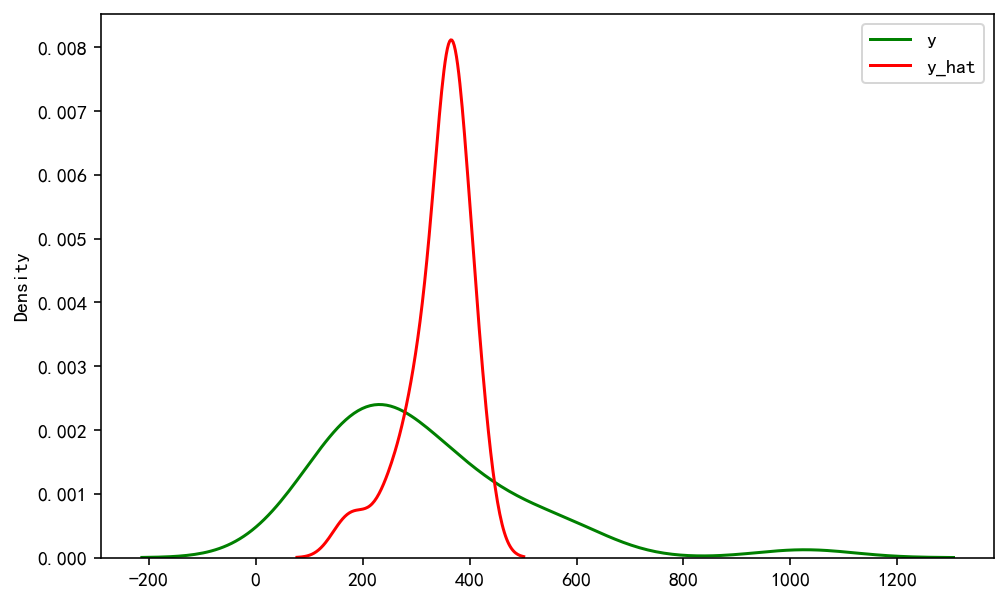

In [61]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(8, 5))
ax1 = sns.distplot(y, hist=False, color = 'green',label="y")

ax2 = sns.distplot(y_hat, hist=False, label="y_hat", color ='red', ax=ax1)

plt.legend()

plt.show()
plt.close()

# 다항회귀로 상관 관계 분석해보기

In [62]:
#df = df.reset_index()

In [63]:
ndf = df

In [64]:
X = ndf[['总计']]
y = ndf[['文章的阅读量']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('훈련 데이터:', X_train.shape)
print('검증 데이터:', y_test.shape)


훈련 데이터: (24, 1)
검증 데이터: (11, 1)


In [65]:
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (24, 1)
2차항 변환 데이터:  (24, 3)


In [66]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

-0.3717410362942408


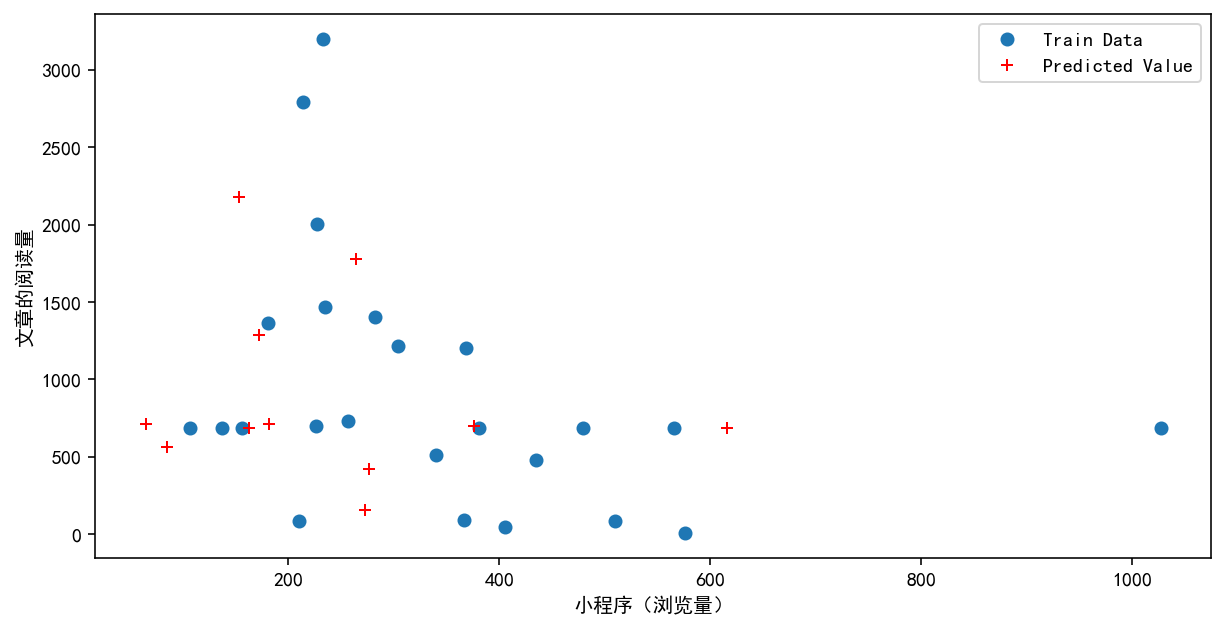

In [67]:
y_hat_test = pr.predict(X_test_poly)
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선

ax.legend(loc='best')
plt.xlabel('小程序（浏览量）')
plt.ylabel('文章的阅读量')
plt.show()
plt.close()

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


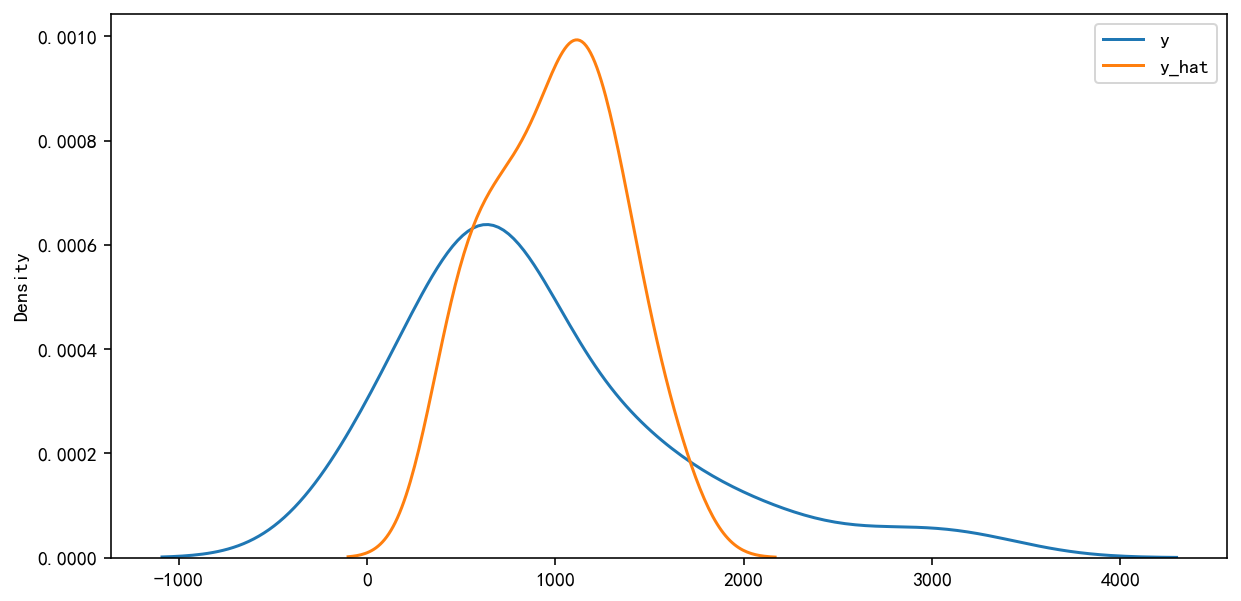

In [68]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

In [69]:
df

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,总计,文章的阅读量
0,02-21,16.0,4.0,184.0,23.0,0,227.0,2002.0
1,02-22,7.0,2.0,114.0,30.0,0,153.0,2177.0
2,02-23,8.0,1.0,155.0,18.0,0,182.0,712.0
3,02-24,22.0,3.0,119.0,19.0,0,163.0,685.0
4,02-25,3.0,1.0,102.0,31.0,0,137.0,685.0
5,02-26,13.0,4.0,127.0,28.0,0,172.0,1290.0
6,02-27,4.0,2.0,79.0,22.0,0,107.0,685.0
7,02-28,73.0,12.0,123.0,28.0,40,276.0,423.0
8,03-01,33.0,18.0,143.0,33.0,6,233.0,3199.0
9,03-02,20.0,4.0,158.0,32.0,0,214.0,2791.0


# 다중회귀분석으로 상관 관계 분석하기
### 利用机器学习多重回归分析的数据相关关系分析

In [70]:
df.columns

Index(['日期', '小程序（浏览量）', '小程序（访客量）', '淘宝（浏览量）', '淘宝（访客量）', '掌上大学', '总计',
       '文章的阅读量'],
      dtype='object')

In [71]:
# 속성(변수)선택
X = df[['小程序（浏览量）','小程序（访客量）','淘宝（访客量）']] #독립변수 X1,X2,X3
y = df['文章的阅读量']

# train data와 test data로 구분(7:3비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (24, 3)
검증 데이터:  (11, 3)


In [72]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 y절편 
print('상수항 b', lr.intercept_)

-0.560611784945424


상수항 b 1729.6445306984838


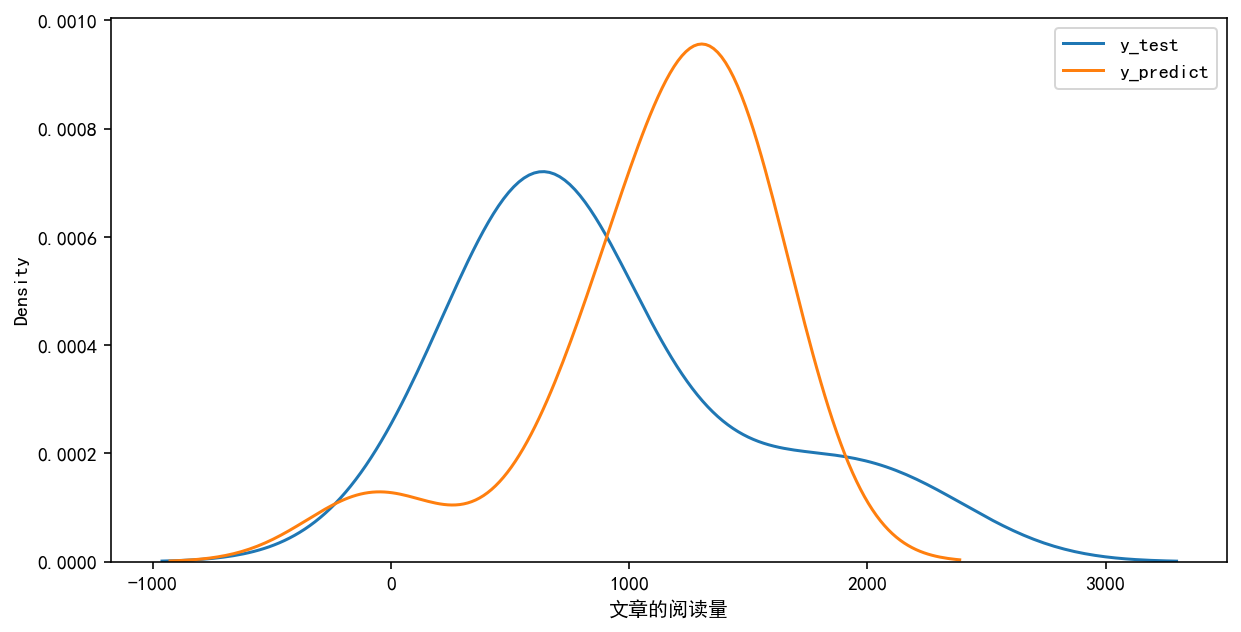

In [73]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_predict", ax=ax1)
plt.legend()
plt.show()

### KNN 분류 알고리즘을 이용하여 상관관계 분석하기
KNN : KNeighborsClassifier()

In [74]:
# 만약에 컬럼에 성별이 있으면 범주형 데이터를 숫자형으로 변환하는 원핫코딩을 이용한다(one-hot-encoding)
# 속성(변수)선택
X = df[['小程序（浏览量）','小程序（访客量）','淘宝（访客量）']] #설명변수 X
y = df['文章的阅读量'] #예측 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (24, 3)
test data 개수:  (11, 3)


In [75]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

#모형 객체 생성(K=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[685.  87. 685.  87. 685. 685. 685. 479. 685. 685.]
[ 685.  159.  712.  423. 1290.  685.  567. 1780.  702.  715.]


In [76]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]]


In [77]:
#모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

        87.0       0.00      0.00      0.00         0
       159.0       0.00      0.00      0.00         1
       423.0       0.00      0.00      0.00         1
       479.0       0.00      0.00      0.00         0
       567.0       0.00      0.00      0.00         1
       685.0       0.25      1.00      0.40         2
       702.0       0.00      0.00      0.00         1
       712.0       0.00      0.00      0.00         1
       715.0       0.00      0.00      0.00         1
      1290.0       0.00      0.00      0.00         1
      1780.0       0.00      0.00      0.00         1
      2177.0       0.00      0.00      0.00         1

    accuracy                           0.18        11
   macro avg       0.02      0.08      0.03        11
weighted avg       0.05      0.18      0.07        11



C:\Users\toyou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\toyou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\toyou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\toyou\anaconda3\lib\site-packages\sklearn\metrics\_cla

# SVM 
### Support Vector Machine

In [78]:
# 속성(변수)선택
X = df[['小程序（浏览量）','小程序（访客量）','淘宝（访客量）']] #설명변수 X
y = df['文章的阅读量'] #예측 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (24, 3)
test data 개수:  (11, 3)


In [79]:
# sklearn라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성(kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat예측(분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[685. 685. 685. 685. 685. 685. 685. 685. 685. 685.]
[ 685.  159.  712.  423. 1290.  685.  567. 1780.  702.  715.]


In [80]:
df.sort_values(by='总计',ascending=False) #总计순으로 sort_values()정렬하여 어느날에 가장많은 값을 가진지 확인.

,日期,小程序（浏览量）,小程序（访客量）,淘宝（浏览量）,淘宝（访客量）,掌上大学,总计,文章的阅读量
18,03-11,158.0,28.0,779.0,62.0,0,1027.0,685.0
23,03-16,429.0,35.0,117.0,35.0,0,616.0,685.0
33,03-26,248.0,73.0,197.0,58.0,0,576.0,10.0
32,03-25,260.0,71.0,180.0,55.0,0,566.0,685.0
27,03-20,3.0,2.0,395.0,110.0,0,510.0,89.0
25,03-18,136.0,13.0,273.0,45.0,12,479.0,685.0
16,03-09,221.0,35.0,150.0,29.0,0,435.0,479.0
29,03-22,111.0,17.0,200.0,77.0,0,405.0,46.0
34,03-27,222.0,62.0,73.0,24.0,0,381.0,685.0
26,03-19,98.0,17.0,209.0,52.0,/,376.0,702.0
